Text(0.5, 1.0, '')

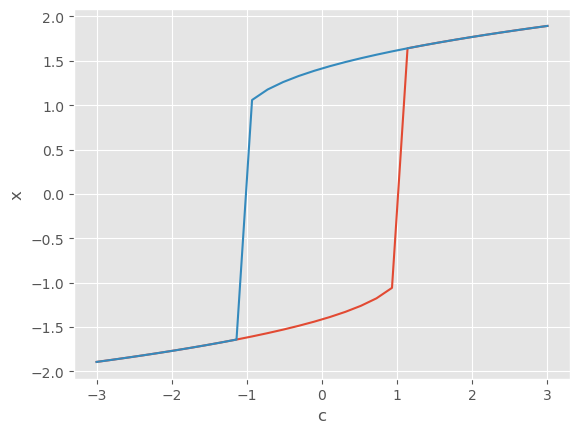

In [9]:
import numpy as np
from poincare import *
import matplotlib.pyplot as plt


class BiasedDouble(System):
    x: Variable = initial(default=-2)
    v: Derivative = x.derive(initial=0)
    c: Parameter = assign(default=1)

    eq = v.derive() << -v - x**3 + 2 * x + c


sim_2 = Simulator(BiasedDouble)
steady = SteadyState(t_end=1000)
uad = steady.sweep_up_and_down(
    sim_2, variable=BiasedDouble.c, values=np.linspace(-3, 3, 30)
)

uad.sel(direction="up")["x"].plot(label="Up")
uad.sel(direction="down")["x"].plot(label="Down")
plt.title("")

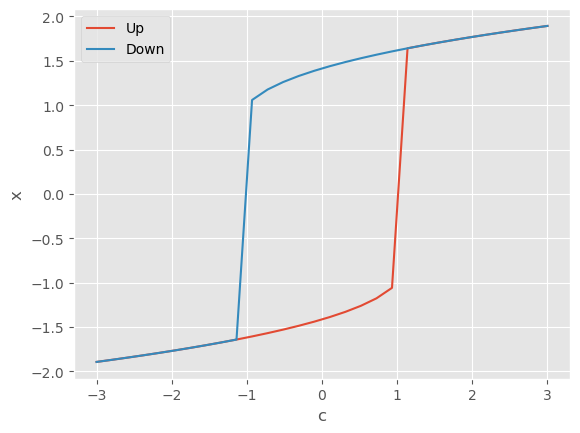

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

uad.sel(direction="up")["x"].plot(label="Up")
uad.sel(direction="down")["x"].plot(label="Down")
plt.legend()
plt.title("")
plt.savefig(
    "../docs/images/bistability_example.svg",
    format="svg",
    bbox_inches="tight",
    pad_inches=0,
)